In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
data = pd.read_csv("../datasets/nordics_weather.csv")

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Extract features from the datetime column
data['timestamp'] = data['date'].astype(int) // 10**9
# print(data['date'][1])

In [16]:
X = data[['timestamp']]
y = data['tavg']
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X.values, y)

LinearRegression()

In [20]:
new_datetime = pd.to_datetime('01/01/2015', format='%m/%d/%Y')
new_timestamp = new_datetime.timestamp()
new_temperature = model.predict([[new_timestamp]])

new_datetime_2049 = pd.to_datetime('01/01/2040', format='%m/%d/%Y')
new_timestamp_2049 = new_datetime_2049.timestamp()
new_temperature_2049 = model.predict([[new_timestamp_2049]])

print('date:', new_datetime ,'Predicted temperature:', new_temperature)
print('date:', new_datetime_2049 ,'Predicted temperature:', new_temperature_2049)

date: 2015-01-01 00:00:00 Predicted temperature: [4.45917909]
date: 2040-01-01 00:00:00 Predicted temperature: [8.31080118]


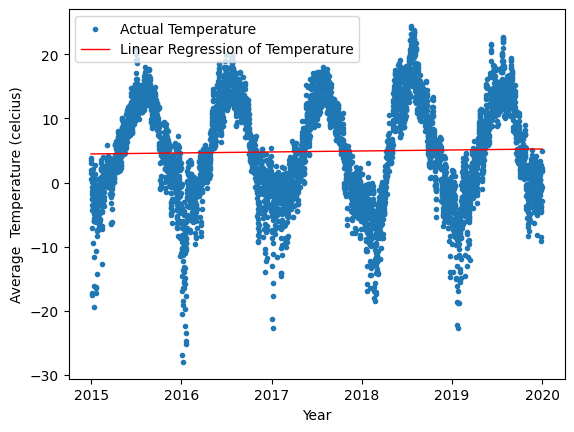

In [18]:
plt.xlabel('Year')
plt.ylabel('Average  Temperature (celcius)')
plt.scatter(data['date'], data['tavg'], marker='.', label='Actual Temperature')
plt.plot(data['date'], model.predict(X.values), color='red', linewidth=1, label='Linear Regression of Temperature')
plt.savefig('../output-results/nordicTemperature.png')
plt.legend(loc=2)

plt.show()